## Data Understanding and Preparation

    
### Lecture 1: Statistics
    
    
<ol>
  <li>Population vs Sample </li>
  <li>Sampling from population: Sample means and their variance </li>
  <li>Hypothesis testing  </li>
  <li>Analysis of Variance </li>
  <li>Correlation and Causality  </li>
</ol>

Basic imports of libraries: Numpy and Pandas <br>
Functions to call in questions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import numpy as np
import scipy.stats as st
import math
import scipy.stats
from scipy import stats


def SamplePopulation(Population,Sample_size, NSamples):
    Samples = []
    for i in range(NSamples):
        Sample = []
        for i in range(Sample_size):
            element=np.random.randint(len(Population))
            Sample.append(Population[element])
            Population.remove(Sample[-1])
    
        Samples.append(Sample)
        for item in Sample:
             Population.append(item)
        
    return Samples

def TestHypothesis(sample_size,sample_mean,sample_stdev,pop_mean,pop_stdev,twosided,conflevel):
    # find test statistic 
    ztest = False
    test_stat = 0
    p_val = 0
    conclusion = ''
    
    if pop_stdev is None:
        # use t-score with sample stdev 
        test_stat = (sample_mean-pop_mean)/(sample_stdev/np.sqrt(sample_size))
    else:
        if sample_size > 30:
        # use z-score
             test_stat = (sample_mean-pop_mean)/(pop_stdev/np.sqrt(sample_size))
             ztest = True 
        else:
        # use t-score with pop_stdev
             test_stat = (sample_mean-pop_mean)/(pop_stdev/np.sqrt(sample_size))
            
    print('test statistic :',test_stat,', z test:',ztest)
 
    if ztest: 
        p_val = st.norm.cdf(test_stat) 
    else:
        p_val = st.t.sf(np.abs(test_stat), sample_size-1)
       
    
    if twosided: 
        p_val = 2*p_val
    else:
        if (sample_mean > pop_mean):
            p_val = 1 - p_val 
      
        
    if p_val < conflevel:
        conclusion = 'Reject H0!'
    else:
        conclusion = 'Fail to reject H0!'
        
    return p_val,conclusion

def ANOVA(dataframe,groupfeature):
    
    N = len(dataframe) ; k = len(pd.unique(dataframe.group)); n = dataframe.groupby(groupfeature).size()[0] 
    DFbetween = k - 1; DFwithin = N - k; DFtotal = N - 1

    grps = pd.unique(data.group)
    d_data = {grp:dataframe["weight"][dataframe.group == grp] for grp in grps}

    SSbetween = (sum(dataframe.groupby("group").sum()["weight"]**2)/n) - (dataframe["weight"].sum()**2)/N
    sum_y_squared = sum([value**2 for value in dataframe["weight"].values])
    SSwithin = sum_y_squared - sum(dataframe.groupby("group").sum()["weight"]**2)/n
    SStotal = sum_y_squared - (dataframe["weight"].sum()**2)/N


    MSbetween = SSbetween/DFbetween; MSwithin = SSwithin/DFwithin
    F_man = MSbetween/MSwithin; p_man = stats.f.sf(F_man, DFbetween, DFwithin)
    eta_sqrd = SSbetween/SStotal; om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)


    F, p = stats.f_oneway(d_data["ctrl"], d_data["trt1"], d_data["trt2"])
    #print("Manually computed ANOVA: F-value",F_man,", P-value",p_man)
    #print("SciPy computed ANOVA: F-Statistics",F,", P-value",p)
    
    return F_man,p_man


**Part 1**

**Q1:** Define a sample of size 10 by manually specifying the number in it. Find mean, variance and standard deviation of the sample. Change one item value in the sampling such that the variance *increases* significantly. Change one item value in the sampling such that the variance *decreses* significantly. 

In [8]:
Q1Sample = [1,2,4,6,7,8,10,12,13,5]

Q1mean = sum(Q1Sample) / len(Q1Sample)
Q1variance = sum([(x - Q1mean)**2 for x in Q1Sample])/len(Q1Sample)
print('Sample:', Q1Sample )
print('Statistics: ',' mean ', Q1mean , ', variance: ', Q1variance )

Sample: [1, 2, 4, 6, 7, 8, 10, 12, 13, 5]
Statistics:   mean  6.8 , variance:  14.560000000000002


**Q2:** Population: Create a list of 10000 numbers that are randomly selected from the interval [1,10] representing a population. Check the parameters of the population: Mean, Variance, Standard deviation

In [4]:
Q2Population = [random.choice(range(1,11,1)) for x in range(10000)]
Q2mean = sum(Q2Population) / len(Q2Population)
Q2variance = sum([(x - Q2mean)**2 for x in Q2Population])/len(Q2Population)
print('Population size: ', len(Q2Population) )
print('Parameters: ',' mean ', Q2mean , ', variance: ', Q2variance )

Population size:  10000
Parameters:   mean  5.5299 , variance:  8.17990598999963


**Q3:** Sampling: Examine SamplePopulation function and call it to create a sample of size 100 random from the population in previous question and find the statistics of the sample: Mean, median, sample variance and sample deviation. 

In [23]:
Samples  = SamplePopulation(Q2Population,100, 1)
Q3Sample = Samples[0]
Q3mean = sum(Q3Sample) / len(Q3Sample)
Q3variance = sum([(x - Q3mean)**2 for x in Q3Sample])/len(Q3Sample)
print('Sample:', Q3Sample )
print('Statistics: ',' mean ', Q3mean , ', variance: ', Q3variance )


Sample: [5, 9, 9, 8, 10, 8, 10, 1, 5, 3, 8, 8, 8, 6, 2, 4, 6, 9, 5, 5, 4, 8, 10, 10, 10, 2, 9, 4, 4, 7, 3, 9, 5, 5, 9, 8, 7, 10, 10, 8, 2, 6, 8, 7, 6, 9, 8, 8, 3, 3, 1, 7, 3, 5, 9, 7, 2, 6, 9, 2, 10, 4, 8, 4, 7, 1, 4, 5, 1, 10, 10, 8, 8, 9, 2, 2, 2, 10, 5, 5, 6, 2, 7, 1, 7, 5, 8, 5, 5, 2, 5, 7, 9, 8, 8, 3, 8, 6, 2, 10]
Statistics:   mean  6.11 , variance:  7.677899999999998


**Q4:** Create three populations, by changing the value of variable "disttype" from 0 to 2 representing normal, exponential, and uniform distributions with mean 100 and standard deviation 5. Plot them on the same figure. 

C:\Users\Murat FIRAT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

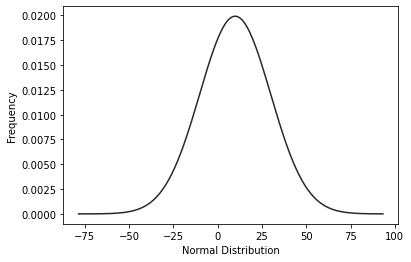

In [32]:
import seaborn as sns
from scipy.stats import uniform, norm, expon, gamma

n = 10000
start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc = start, scale=width)
data_normal = norm.rvs(size=n, loc = start, scale=width)
data_expon = expon.rvs(scale=1,loc=0,size=n)

distribution_names = ["Normal","Uniform","Exponential"] 
data_dict = {"Normal":data_normal,"Uniform":data_uniform,"Exponential":data_expon}
distributions = [norm,uniform,expon]
disttype = 0
ax = sns.distplot(data_dict[distribution_names[disttype]], fit=distributions[disttype], kde=False,hist=False)
ax.set(xlabel=distribution_names[disttype]+" Distribution", ylabel="Frequency")

**Q5:** Standardize the population values in the previous question, plot them again in the same figure. 

C:\Users\Murat FIRAT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Standard Normal Distribution'), Text(0, 0.5, 'Frequency')]

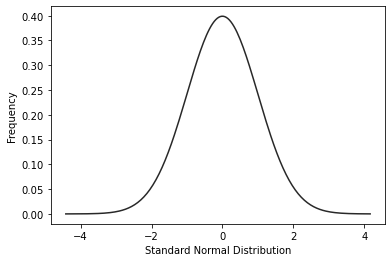

In [33]:
from sklearn.preprocessing import StandardScaler
import numpy as np

Q5Population = data_dict[distribution_names[disttype]]

std_Population  = (Q5Population - Q5Population.mean())/(Q5Population.std())

ax = sns.distplot(std_Population, fit=distributions[disttype], kde=False,hist=False)
ax.set(xlabel="Standard "+distribution_names[disttype]+" Distribution", ylabel="Frequency")


**Part 2**

**Q6:**  Create a list of 100000 numbers that are randomly selected from the interval [1,10] representing a population. Check the parameters of the population: Mean, Variance, Standard deviation. Make 50 samplings from the population of each of sizes 20,150. 


In [52]:
import matplotlib.pyplot as plt

Q6Population = [random.choice(range(1,11,1)) for x in range(1000)]

Q6mean = sum(Q6Population) / len(Q6Population)
Q6variance = sum([(x - Q6mean)**2 for x in Q6Population])/len(Q6Population)
print('Population size: ', len(Q2Population) )
print('Parameters: ',' mean ', Q6mean , ', variance: ', Q6variance )

Samplingsizes = [30,40,100]
Q6Samplings = [SamplePopulation(Q6Population,i, 300) for i in Samplingsizes]
  

Population size:  10000
Parameters:   mean  5.584 , variance:  8.470944000000008


**Q7:** Find the *means* of the samplings of two different sizes above. Plot them in a figure separately for each size. Comment on the density values of samples of different sizes.

C:\Users\Murat FIRAT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


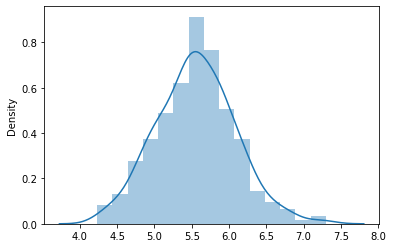

C:\Users\Murat FIRAT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


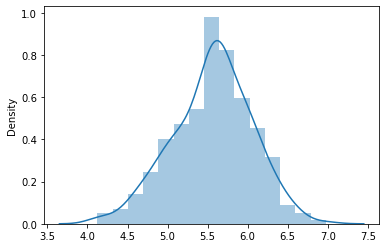

C:\Users\Murat FIRAT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


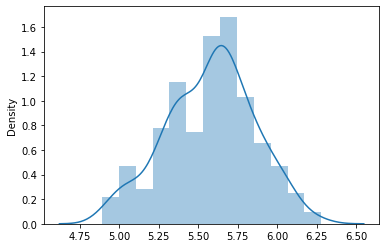

In [53]:
Q7Samplingmeans = [[np.mean(sample) for sample in sampleset] for sampleset in Q6Samplings]

 
for meansset in Q7Samplingmeans:  
    sns.distplot(meansset)
    plt.show()
    

**Q8:** Find the sample *variances* of the sampling means that you found in the previous question. Print them separately for each size.

In [54]:
Q8SamplingMeanvariances = []

for meanset in Q7Samplingmeans:
    
    mean = sum(meanset) / len(meanset)
    
    Q8SamplingMeanvariances.append(sum([(x - mean)**2 for x in meanset])/len(meanset))
    
index = 0 
for variance in Q8SamplingMeanvariances:  
    print('Variance of sampling means of size',Samplingsizes[index],':', variance)
    index+=1
    

Variance of sampling means of size 30 : 0.2782312469135801
Variance of sampling means of size 40 : 0.24472613888888906
Variance of sampling means of size 100 : 0.07864702666666666


**Q9**

----------
#### Hypothesis Testing

####  Two-tailed case:  Bulb manufacturer


A light bulb manufacturer claims that its' energy saving light bulbs last on average 60 days.


 H0 : The mean lifetime of a light bulb is 60 days. (µ = 60)
 
 H1 : The mean lifetime of a light bulb is not 60 days. (µ ≠ 60) 
 


A sampling of size 49 is collected from the production output with a mean of 56.5 days. Using confidence level 0.05, can we statically reject the claim of the manufacturer? Assume that the standard deviation of bulb lifetime is 9 days. 
 

In [60]:
testreturn = TestHypothesis(49,56.5,None,60,9,True,0.05) # light bulb manufacturer, slide 36 
print('P-value: ',testreturn[0],' Test result: ',testreturn[1])


test statistic : -2.722222222222222 , z test: True
P-value:  0.006484452196655412  Test result:  Reject H0!


**Q10:** 
#### One-tailed case:  Decision for a new supplier


The deviation in target length of the parts from the new supplier must be smaller than the target value of 1.5 mm. Otherwise, we will not change the current supplier. 

***Interest:*** Finding statistical evidence that the parts of the new supplier have significantly less deviation in order to change the supplier.   

A sampling of size 45 is collected from the products of the new supplier with a deviation of  1.2 mm. Using confidence level 0.01, can we statically reject the null hypothesis? Assume that the standard deviation of the products of the new supplier is 0.4 mm. Can we reject the null hypothesis in the favour of the new supplier?

                                   
H0: Mean of deviation of parts from new supplier is equal to 1.5 mm (µ = 1.5) 


H1: Mean of deviation of parts from new supplier is smaller than 1.5 mm (µ < 1.5)  

In [59]:
testreturn = TestHypothesis(45,1.2,None,1.5,0.4,False,0.01) # Decision for a new supplier, slide 40
print('P-value: ',testreturn[0],' Test result: ',testreturn[1])


test statistic : -5.031152949374528 , z test: True
P-value:  2.4376949983627335e-07  Test result:  Reject H0!


**Q11:** 
##### One-tailed case:  Contamination of food

The Food and Drug Administration (FDA) sets acceptable levels of foreign substances that end up in our food and drink. The acceptable level for insect fragments in peanut butter is 3 fragments per 10 grams. 

***Interest:*** Finding problematic products in market; i.e. the food sampling that significantly contains fragments more than allowed in the regulation.

A sampling of size 50 is collected from the products of a food producer with a mean of 3.6 fragments per 10 grams. Using confidence level 0.05, can we statically reject the null hypothesis? Assume that the standard deviation of all products is √3. Can we reject the null hypothesis to penalize the food producer?

                                   
H0: The food contains 3 fragments of foreign substances per 10 gr. (µ <= 3)  <br>
H1: The food contains more than 3 fragments of foreign substances per 10 gr. (µ > 3)  

In [58]:
testreturn = TestHypothesis(50,3.6,None,3,np.sqrt(3),False,0.05) # Contamination of food, slide 43
print('P-value: ',testreturn[0],' Test result: ',testreturn[1])


test statistic : 2.4494897427831788 , z test: True
P-value:  0.00715293921771476  Test result:  Reject H0!


**Q12:** 

##### One-tailed small-sample case:  Contamination of food

The Food and Drug Administration (FDA) sets acceptable levels of foreign substances that end up in our food and drink. The acceptable level for insect fragments in peanut butter is 3 fragments per 10 grams. 

***Interest:*** Finding problematic products in market; i.e. the food sampling that significantly contains fragments more than allowed in the regulation.

A sampling of size 20 is collected from the products of a food producer with a mean of 3.6 fragments per 10 grams. Using confidence level 0.05, can we statically reject the null hypothesis? Assume that the standard deviation of all products is √3. Can we reject the null hypothesis to penalize the food producer?


                                   
H0: The food contains 3 fragments of foreign substances per 10 gr. (µ <= 3) 


H1: The food contains more than 3 fragments of foreign substances per 10 gr. (µ > 3)  

In [61]:
testreturn= TestHypothesis(20,3.6,None,3,np.sqrt(3),False,0.05)   # Contamination of food-2, slide 48
print('P-value: ',testreturn[0],' Test result: ',testreturn[1])


test statistic : 1.5491933384829673 , z test: False
P-value:  0.06891581818714575  Test result:  Fail to reject H0!


**Q13:** Examine and call TestHypothesis function for the hypothesis examples in Lecture DUP1 slides 36, 40, 43, and 48. 

----------
### Analysis of Varianve (ANOVA)

Plant growth data set
   Each instance is a plant and has two features: Weight and group.

----> Size of the data set: 30
----> Columns and data types:
Unnamed: 0      Int64
weight        Float64
group          string
dtype: object
----> Unique values of columns:
Unnamed: 0 :  30
weight :  29
group :  3


,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.5,ctrl


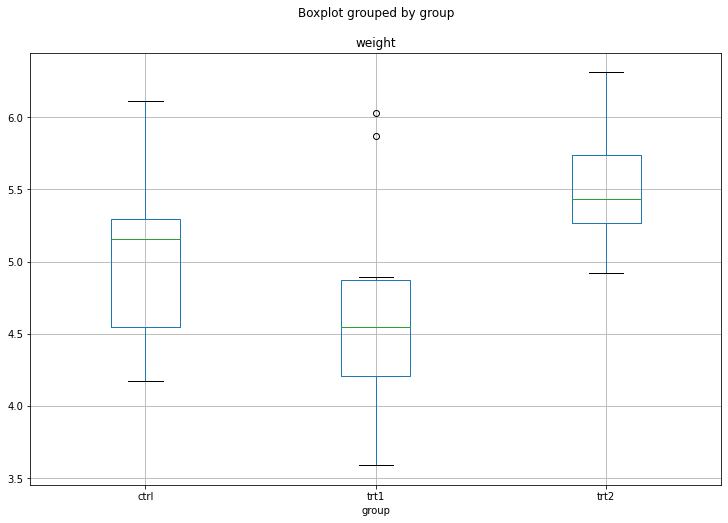

In [10]:
import pandas as pd
from scipy import stats

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv")
data.boxplot("weight", by="group", figsize=(12, 8))
data = data.convert_dtypes()
print("----> Size of the data set:",len(data))

print("----> Columns and data types:")     
print(data.dtypes)

print("----> Unique values of columns:")
for col in data.columns:
        print(col,": ",len(data[col].unique()))
        
data.head(5)    


In PlantGrowth dataset, define the groups of plants with respect to feature "group" of values ctrl, trt1, and trt2. Conduct an ANOVA to test if the plant weights of three groups come from the same population.

In [9]:
import pandas as pd

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv")
fncreturn = ANOVA(data,"group")

print("ANOVA: F-value",fncreturn[0],", P-value",fncreturn[1])


ANOVA: F-value 4.846087862380118 , P-value 0.015909958325623124


----------
### Correlation and Causality

Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. 

Correlation Coefficient: A single number, denoted by ‘r’, that describes the degree of relationship between two variables. Its value ranges from +1.0 to –1.0.



If r < 0, the variables move in opposite directions, that is when one increases the other decreases or vice versa.


If r > 0, the variables both variables move in tandem, that is when one increases the other decreases or vice versa.

Simple linear regression analysis is used to find the correlation coefficient. 


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
df = pd.read_excel("https://happiness-report.s3.amazonaws.com/2022/DataForTable2.1.xls")
df.head(200)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Bolivia,2014,5.864799,8.952947,0.821345,62.500000,0.881059,0.017006,0.831854,0.769011,0.398219,0.468561
196,Bolivia,2015,5.834329,8.985247,0.828706,62.700001,0.883625,-0.030384,0.862374,0.748659,0.392903,0.487209
197,Bolivia,2016,5.769723,9.012199,0.795959,62.849998,0.881749,-0.047644,0.852593,0.735729,0.376412,0.401742
198,Bolivia,2017,5.650553,9.038804,0.778662,63.000000,0.883905,-0.121301,0.819262,0.655217,0.433944,0.427633


World Happiness Data

In [12]:

import statsmodels.formula.api as smf
import pandas as pd

def standardize(df,col):
    df["std "+col] = (df[col]- df[col].mean())/df[col].std() 
df = pd.read_excel("https://happiness-report.s3.amazonaws.com/2022/DataForTable2.1.xls")

colmnlist = ["Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Perceptions of corruption"]
df_grouped = df[df["year"] >= 2017].groupby(["Country name"])[colmnlist].apply(lambda x: x.mean())

for col in colmnlist:
    df_grouped[col] = pd.to_numeric(df_grouped[col], errors='coerce')
df_grouped = df_grouped.dropna()

standardize(df_grouped,colmnlist[0]); standardize(df_grouped,colmnlist[2])

fit = smf.ols('Q("std Log GDP per capita") ~ Q("std Healthy life expectancy at birth")', data=df_grouped).fit() # Fit and summarize OLS model
print("Regression slope (ols)",fit.params['Q("std Healthy life expectancy at birth")'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped["std Log GDP per capita"],df_grouped["std Healthy life expectancy at birth"])
print("Regression slope (stats)",slope)
corr = stats.pearsonr(df_grouped["std Log GDP per capita"], df_grouped["std Healthy life expectancy at birth"] )
print("Perason Correlation: ",corr)

Regression slope (ols) 0.8357887779794378
Regression slope (stats) 0.8357887779794387
Perason Correlation:  (0.835788777979438, 9.426511928339598e-38)


----------
###  Causality

Causality means that a change in one variable triggers a change in the other; a cause-and-effect relationship. Besides the correlation, there is also a causal link between them.

In [13]:
colmnlist = ["Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Perceptions of corruption"]

df_grouped[colmnlist].head()

#df_grouped[colmnlist].corr()


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption
Country name,,,,,
Afghanistan,7.626750,0.468136,53.81875,0.397127,0.938037
Albania,9.504680,0.683931,69.10000,0.786460,0.895407
Algeria,9.333753,0.823405,66.40000,0.507502,0.727050
Argentina,9.989240,0.896478,67.10000,0.827557,0.831761
Armenia,9.468753,0.764005,67.03125,0.765209,0.707579


----------
Causality using Python causality library 

Install: pip install causality

https://pypi.org/project/causality/

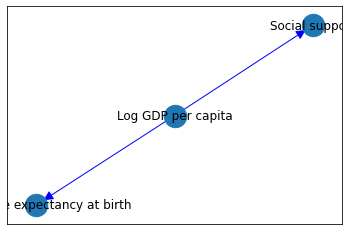

In [18]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest
import networkx as nx
colmnlist2 = ["Log GDP per capita","Social support","Healthy life expectancy at birth"]
df_grouped = df_grouped[colmnlist2] 

for col in colmnlist2:
    df_grouped[col] = pd.to_numeric(df_grouped[col], errors='coerce')

df_grouped = df_grouped.dropna()

variable_types = {"Log GDP per capita":'c',"Social support":'c',"Healthy life expectancy at birth":'c'}

ic_algorithm = IC(RobustRegressionTest) # run the search
graph = ic_algorithm.search(df_grouped, variable_types)
graph.edges(data=True)

pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(graph, pos)
nx.draw_networkx_edges(graph, pos, edge_color='b', arrows=True,arrowsize=20)
plt.show()
